## Import packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

plt.style.use('fivethirtyeight')
%matplotlib inline

## Create Dataset

###### Importing of stock data from Yahoo Finance including S&P500 from 17 Oct 2019 to 16 Oct 2020

In [50]:
sea_stock_data = pd.read_csv('Financials/SE.csv', parse_dates=['Date'], index_col='Date').dropna()
tencent_stock_data = pd.read_csv('Financials/TCEHY.csv', parse_dates=['Date'], index_col='Date').dropna()
alibaba_stock_data = pd.read_csv('Financials/BABA.csv', parse_dates=['Date'], index_col='Date').dropna()
sp_stock_data = pd.read_csv("Financials/^GSPC.csv", parse_dates=['Date'], index_col='Date').dropna()

print(sea_stock_data.head())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-10-17  28.520000  28.780001  27.750000  27.830000  27.830000  2370200
2019-10-18  27.559999  27.730000  26.719999  26.980000  26.980000  4361800
2019-10-21  26.980000  27.430000  26.410000  27.230000  27.230000  4058300
2019-10-22  27.230000  27.930000  26.660000  26.700001  26.700001  3681800
2019-10-23  26.770000  27.650000  26.650000  27.260000  27.260000  3985000


## SEA Limited Visualisation

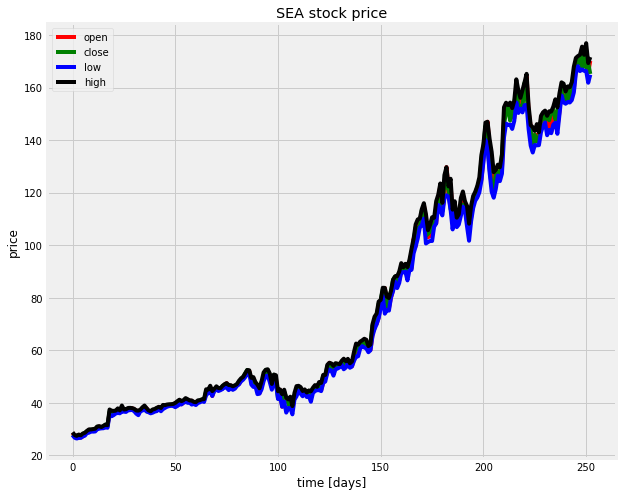

In [51]:
plt.figure(figsize=(20, 8));
plt.subplot(1,2,1);
plt.plot(sea_stock_data.Open.values, color='red', label='open')
plt.plot(sea_stock_data.Close.values, color='green', label='close')
plt.plot(sea_stock_data.Low.values, color='blue', label='low')
plt.plot(sea_stock_data.High.values, color='black', label='high')
plt.title('SEA stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

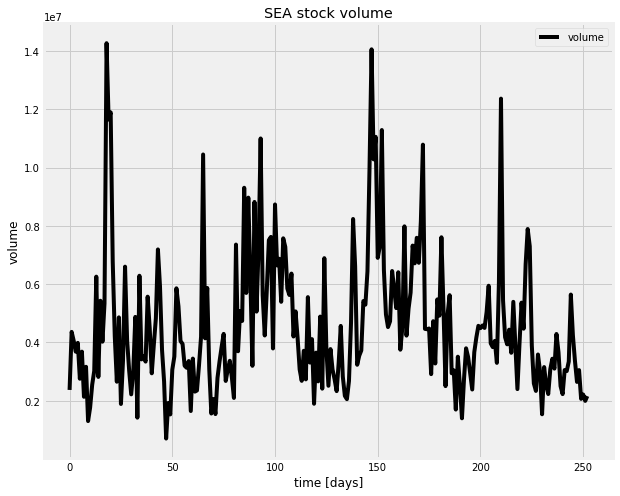

In [52]:
plt.figure(figsize=(20, 8));
plt.subplot(1,2,2);
plt.plot(sea_stock_data.Volume.values, color='black', label='volume')
plt.title('SEA stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

## Stock Price Data

In [53]:
sea_stock_data = sea_stock_data[['Open']]
print(sea_stock_data.head())

                 Open
Date                 
2019-10-17  28.520000
2019-10-18  27.559999
2019-10-21  26.980000
2019-10-22  27.230000
2019-10-23  26.770000


In [54]:
tencent_stock_data = tencent_stock_data[['Open']]
print(tencent_stock_data.head())

                 Open
Date                 
2019-10-17  42.119999
2019-10-18  42.080002
2019-10-21  41.410000
2019-10-22  41.680000
2019-10-23  40.529999


In [55]:
alibaba_stock_data = alibaba_stock_data[['Open']]
print(alibaba_stock_data.head())

                  Open
Date                  
2019-10-17  178.000000
2019-10-18  176.000000
2019-10-21  172.639999
2019-10-22  174.529999
2019-10-23  170.449997


In [56]:
sp_stock_data = sp_stock_data[['Open']]
print(sp_stock_data.head())

                   Open
Date                   
2019-10-17  3000.770020
2019-10-18  2996.840088
2019-10-21  2996.479980
2019-10-22  3010.729980
2019-10-23  2994.010010


###### This tells us that there are 253 trading days for the stocks

In [68]:
sea_stock_data.info()
alibaba_stock_data.info()
tencent_stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


###### Comparing plot for the open stock price we can see that SEA Limited has a much steeper slope in terms of their stock price movement. We can conclude that there is a higher return, however we still do not know much about the risk and excess return compared to the market. 

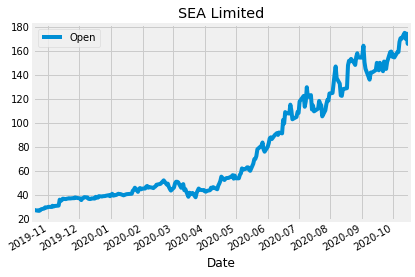

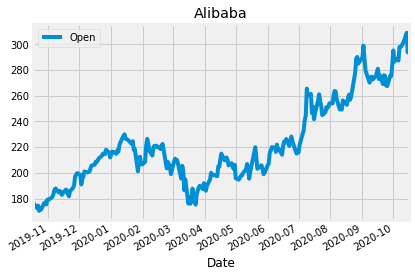

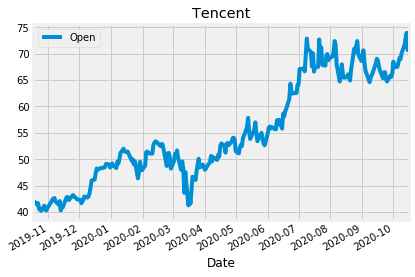

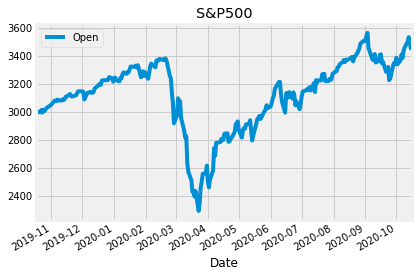

In [58]:
# Stock price from 17 Oct 2019 to 16 Oct 2020
sea_stock_data.plot(title="SEA Limited")
alibaba_stock_data.plot(title="Alibaba")
tencent_stock_data.plot(title="Tencent")
sp_stock_data.plot(title="S&P500")
plt.legend(loc='best')

In [59]:
sea_stock_data.describe()

,Open
count,253.000000
mean,78.025712
std,45.458695
min,26.770000
25%,40.759998
50%,53.540001
75%,117.849998
max,175.000000


In [24]:
alibaba_stock_data.describe()

,Open
count,253.000000
mean,223.067636
std,34.187256
min,170.449997
25%,199.000000
50%,215.009995
75%,250.339996
max,309.000000


In [25]:
tencent_stock_data.describe()

,Open
count,253.000000
mean,55.230395
std,9.918008
min,40.209999
25%,48.310001
50%,52.660000
75%,65.860001
max,73.970001


In [26]:
sp_stock_data.describe()

,Open
count,253.000000
mean,3121.923871
std,254.990488
min,2290.709961
25%,3004.080078
50%,3147.179932
75%,3317.370117
max,3564.739990


## Daily stock returns 

###### To calculate the return, we need to calculate the percentage change in value from one trading day to the next.

In [60]:
sea_stock_return = sea_stock_data.pct_change()
sea_stock_return.columns = ['Returns']
print(sea_stock_return.head())

             Returns
Date                
2019-10-17       NaN
2019-10-18 -0.033661
2019-10-21 -0.021045
2019-10-22  0.009266
2019-10-23 -0.016893


In [61]:
alibaba_stock_return = alibaba_stock_data.pct_change()
alibaba_stock_return.columns = ['Returns']
print(alibaba_stock_return.head())


             Returns
Date                
2019-10-17       NaN
2019-10-18 -0.011236
2019-10-21 -0.019091
2019-10-22  0.010948
2019-10-23 -0.023377


In [62]:
tencent_stock_return = tencent_stock_data.pct_change()
tencent_stock_return.columns = ['Returns']
print(tencent_stock_return.head())

             Returns
Date                
2019-10-17       NaN
2019-10-18 -0.000950
2019-10-21 -0.015922
2019-10-22  0.006520
2019-10-23 -0.027591


In [63]:
sp_stock_return = sp_stock_data.pct_change()
sp_stock_return.columns = ['Returns']
print(sp_stock_return.head())

             Returns
Date                
2019-10-17       NaN
2019-10-18 -0.001310
2019-10-21 -0.000120
2019-10-22  0.004756
2019-10-23 -0.005553


###### The movement of excess return of stock per day is plotted below. We see that SEA Limited y axis is much greater compared to Alibaba and Tencent. There is a possibly that SEA Limited has a much higher return but equally high risk as well. To further make comparison for the 3 stocks, we will use the S&P500 excess return as a benchmark to compare performance.

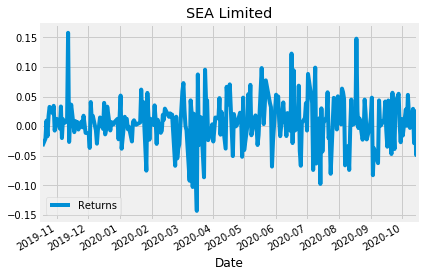

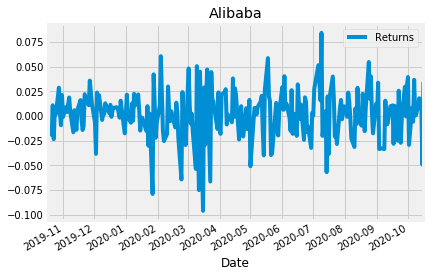

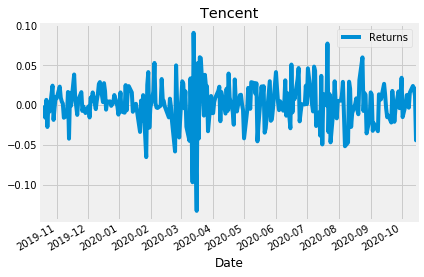

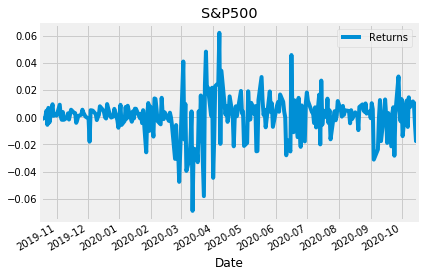

In [64]:
sea_stock_return.plot(title="SEA Limited")
alibaba_stock_return.plot(title="Alibaba")
tencent_stock_return.plot(title="Tencent")
sp_stock_return.plot(title="S&P500")

## Excess return for SEA, Alibaba, Tencent vs. S&P 500

###### Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark as show below. This is calculated as the difference in returns between each stock_returns and sp_returns for each day. 

In [73]:
excess_return_sea = sea_stock_return.sub(sp_stock_return,axis=0)
excess_return_alibaba = alibaba_stock_return.sub(sp_stock_return,axis=0)
excess_return_tencent = tencent_stock_return.sub(sp_stock_return,axis=0)
excess_return_sea.columns = ['Excess Returns']
excess_return_alibaba.columns = ['Excess Returns']
excess_return_tencent.columns = ['Excess Returns']


print(excess_return_sea.head())

            Excess Returns
Date                      
2019-10-17             NaN
2019-10-18       -0.032351
2019-10-21       -0.020925
2019-10-22        0.004511
2019-10-23       -0.011340


###### After pegging the excess return of each stock to the S&P500 the following plots are used. 

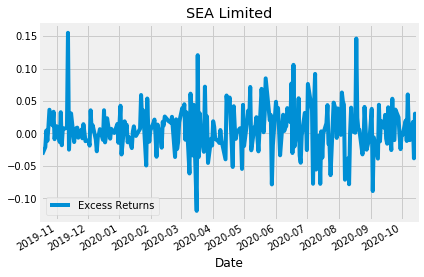

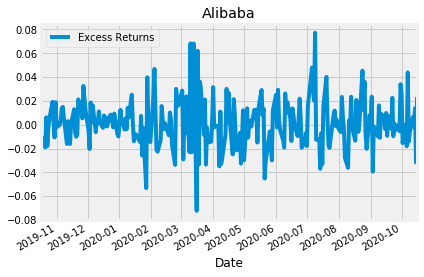

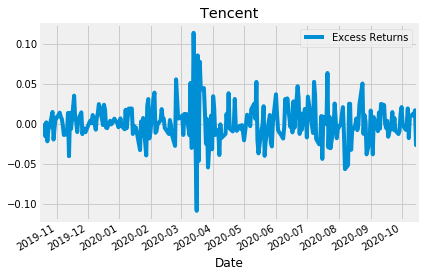

In [66]:
# Movement of excess return pegged against S&P500 
excess_return_sea.plot(title="SEA Limited")
excess_return_alibaba.plot(title="Alibaba")
excess_return_tencent.plot(title="Tencent")

## Sharpe Ratio - Average Difference in Daily Returns Stock 

###### Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

In [191]:
# Average daily excess return for SEA Limited = 0.0721% 
avg_excess_return_sea = excess_return_sea.mean()
avg_excess_return_sea

Open    0.007209
dtype: float64

In [192]:
# Average daily excess return for Alibaba = 0.0170% 
avg_excess_return_alibaba = excess_return_alibaba.mean()
avg_excess_return_alibaba

Open    0.001704
dtype: float64

In [193]:
# Average daily excess return for Tencent = 0.0178% 
avg_excess_return_tencent = excess_return_tencent.mean()
avg_excess_return_tencent

Open    0.001772
dtype: float64

## Sharpe Ratio - Standard Deviation of the Return Difference

###### Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stock implies as compared to an investment in the S&P 500. We can see that SEA Limited has the highest standard deviation at 3.56% followed by Tencent and finally Alibaba. 

In [194]:
# Standard deviation of excess return for SEA Limited = 0.0358%
sd_excess_return_sea = excess_return_sea.std()
sd_excess_return_sea

Open    0.035835
dtype: float64

In [195]:
# Standard deviation of excess return for Alibaba = 0.0203%%
sd_excess_return_alibaba = excess_return_alibaba.std()
sd_excess_return_alibaba

Open    0.020262
dtype: float64

In [196]:
# Standard deviation of excess return for Tencent = 0.0237%
sd_excess_return_tencent = excess_return_tencent.std()
sd_excess_return_tencent

Open    0.023749
dtype: float64

## Conclusion

###### Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk. 
###### The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. Since we have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √253

In [197]:
# Sharpe ratio of SEA Limited
daily_sharpe_ratio_sea = avg_excess_return_sea.div(sd_excess_return_sea)
annual_factor = np.sqrt(253)
annual_sharpe_ratio_sea = daily_sharpe_ratio_sea.mul(annual_factor)
annual_sharpe_ratio_sea

Open    3.200085
dtype: float64

In [198]:
# Sharpe ratio of Alibaba 
daily_sharpe_ratio_alibaba = avg_excess_return_alibaba.div(sd_excess_return_sea)
annual_sharpe_ratio_alibaba = daily_sharpe_ratio_alibaba.mul(annual_factor)
annual_sharpe_ratio_alibaba

Open    0.756274
dtype: float64

In [199]:
# Sharpe ratio of Tencent
daily_sharpe_ratio_tencent = avg_excess_return_tencent.div(sd_excess_return_sea)
annual_sharpe_ratio_tencent = daily_sharpe_ratio_tencent.mul(annual_factor)
annual_sharpe_ratio_tencent

Open    0.786395
dtype: float64

#### We can see SEA Limited has a sharpe ratio of 3.20 which is considered an excellent investment in terms of the risk to reward. In addition SEA Limited greatly outperforms the sharpe ratio of both Alibaba and Tencent. This means that an investment in SEA Limited returned thrice as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in SEA Limited would have been more attractive.

#### This difference was mostly driven by differences in excess return benchmarked to the S&P500 rather than risk between the three companies as seen by SEA Limited average daily excess return of 0.0721%.  The risk of choosing SEA Limited over Alibaba and Tencent (as measured by the standard deviation) was only slightly higher for SEA Limited. 

#### When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.